# Задача 1. Деньги государства у НКО

<aside>
💡 **Ментор — Юлия Мочалова**

</aside>

Есть дамп данных о всех НКО в России, содержится информация о получении государственных грантов, госконтрактов и субсидий, регионе и дате регистрации и ОКВЭД (классификатор экономической деятельности).

- Проверить, есть ли зависимость вероятности получения грантов от государства / госконтрактов от региона регистрации организации
- Проверить, есть ли зависимость вероятности получения грантов от государства / госконтрактов от возраста организации
- Проверить, есть ли зависимость вероятности получения грантов от государства / госконтрактов от экономической деятельности
- Любые дополнительные выводы и проверки

## Данные

Источник данных: проект [Открытые НКО](https://openngo.ru/)

[Дамп данных в формате JSON](https://drive.google.com/drive/folders/1WiGeZPnoiBqgeQL59AkEC4JiszFNAWl9?usp=sharing), дата актуальности: 26.08.2021

[Описание полей](https://github.com/infoculture/openngo-data-reference/wiki/%D0%A5%D0%B0%D1%80%D0%B0%D0%BA%D1%82%D0%B5%D1%80%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8-%D0%B8-%D1%80%D0%B0%D1%81%D1%88%D0%B8%D1%84%D1%80%D0%BE%D0%B2%D0%BA%D0%B8-%D0%BE%D1%82%D0%BA%D1%80%D1%8B%D1%82%D1%8B%D1%85-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85) на гитхабе

In [225]:
import pandas as pd
from ast import literal_eval as le
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
print(plotly.__version__)

5.8.0


# ПОДГОТОВКА ДАННЫХ

In [133]:
# будем считывать и фильтровать данные из 1 файла, затем к нему добавлять все остальные
data_1 = pd.read_csv('ngo_dump_01.csv', sep=',')

/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_20174/398506255.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data_1 = pd.read_csv('ngo_dump_01.csv', sep=',')


In [134]:
data_1.head(5)

,minjustRegNum,regionName,logo,statusDetail,fullName,dateReg,minjustForm,charter,minjustStatus,ogrn,opf,oktmo,egrulStatus,mainOkved,regionCode,incomeTotal,email,incomeDetail,administrators,inn,okpo,originDate,website,dateLiquid,address,successors,okogu,kpp,hasRegionalSupport,addOkved,okato,okfs,website_punycode,shortName,dateOgrn,predecessors,socialMedia,reports
0,7.814061e+09,Санкт-Петербург,NaN,"{'name': None, 'code': None, 'shortName': 'Дей...",МЕЖРЕГИОНАЛЬНАЯ АНТРОПОСОФСКАЯ МЕДИЦИНСКАЯ АСС...,NaN,"Объединения (союз, ассоциация) юридических лиц",NaN,Зарегистрирована,1207800141790,"{'name': 'Ассоциации (союзы)', 'code': '20600'...","{'name': None, 'code': None}",Действует,{'name': 'Деятельность профессиональных членск...,78,0.0,NaN,"{'grants': {'totalCount': 0, 'totalSum': 0}, '...","[{'name': 'КОШЕЧКИН ДЕНИС ВИКТОРОВИЧ', 'title'...",7.841091e+09,NaN,{'$date': '2020-10-30T00:00:00.000Z'},NaN,NaN,"191186, ГОРОД САНКТ-ПЕТЕРБУРГ, УЛИЦА ИТАЛЬЯНСК...",[],"{'name': None, 'code': None}",784101001.0,False,[],"{'name': None, 'code': None}","{'name': None, 'code': None}",NaN,"""АМА""",{'$date': '2020-10-30T00:00:00.000Z'},[],"{'youtube': None, 'vk': None, 'facebook': None...",[]
1,7.714017e+09,Москва,NaN,"{'name': None, 'code': None, 'shortName': 'Дей...","ФОНД ""СОДЕЙСТВИЕ ДУХОВНОМУ РАЗВИТИЮ ЧЕЛОВЕКА ""...",NaN,Некоммерческий фонд,NaN,Зарегистрирована,1207700349152,"{'name': 'Фонды', 'code': '70400', 'version': ...","{'name': None, 'code': None}",Действует,{'name': 'Предоставление прочих финансовых усл...,77,0.0,NaN,"{'grants': {'totalCount': 0, 'totalSum': 0}, '...","[{'name': 'НИЗАМИЕВ РУСЛАН ВИЛЬДАНОВИЧ', 'titl...",7.720647e+09,NaN,{'$date': '2020-09-23T00:00:00.000Z'},NaN,NaN,"111395, ГОРОД МОСКВА, УЛИЦА МОЛДАГУЛОВОЙ, ДОМ ...",[],"{'name': None, 'code': None}",772001001.0,False,"[{'name': 'Издание книг', 'code': '58.11', 've...","{'name': None, 'code': None}","{'name': None, 'code': None}",NaN,"ФОНД ""УНИВЕРСАЛИСТ М""",{'$date': '2020-09-23T00:00:00.000Z'},[],"{'youtube': None, 'vk': None, 'facebook': None...","[{'localUrl': 'http://cdnx.h5.crftr.net/f/4,18..."
2,7.814170e+09,Санкт-Петербург,NaN,"{'name': None, 'code': None, 'shortName': 'Дей...","КОЛЛЕГИЯ АДВОКАТОВ ""САНКТ-ПЕТЕРБУРГСКАЯ КОЛЛЕГ...",NaN,Коллегия адвокатов,NaN,Зарегистрирована,1207800011430,"{'name': 'Коллегии адвокатов', 'code': '20616'...","{'name': None, 'code': None}",Действует,"{'name': 'Деятельность в области права', 'code...",78,0.0,NaN,"{'grants': {'totalCount': 0, 'totalSum': 0}, '...","[{'name': 'САМОЙЛОВА АНЖЕЛА ВАСИЛЬЕВНА', 'titl...",7.813643e+09,NaN,{'$date': '2020-02-03T00:00:00.000Z'},NaN,NaN,"197198, ГОРОД САНКТ-ПЕТЕРБУРГ, УЛИЦА БОЛЬШАЯ П...",[],"{'name': None, 'code': None}",781301001.0,False,[],"{'name': None, 'code': None}","{'name': None, 'code': None}",NaN,NaN,{'$date': '2020-02-03T00:00:00.000Z'},[],"{'youtube': None, 'vk': None, 'facebook': None...",[]
3,NaN,Москва,NaN,"{'name': None, 'code': None, 'shortName': 'Дей...","ТОВАРИЩЕСТВО СОБСТВЕННИКОВ НЕДВИЖИМОСТИ ""ЛУГИН...",NaN,NaN,NaN,NaN,1207700348976,{'name': 'Товарищества собственников недвижимо...,"{'name': None, 'code': None}",Действует,{'name': 'Управление недвижимым имуществом за ...,77,0.0,NaN,"{'grants': {'totalCount': 0, 'totalSum': 0}, '...","[{'name': 'ГЕЛЬДТ ВЛАДИМИР АНДРЕЕВИЧ', 'title'...",7.733360e+09,NaN,{'$date': '2020-09-23T00:00:00.000Z'},NaN,NaN,"125424, ГОРОД МОСКВА, ШОССЕ ВОЛОКОЛАМСКОЕ, ДОМ...",[],"{'name': None, 'code': None}",773301001.0,False,[{'name': 'Аренда и управление собственным или...,"{'name': None, 'code': None}","{'name': None, 'code': None}",NaN,"ТСН ""ЛУГИНИНО ПАРК""",{'$date': '2020-09-23T00:00:00.000Z'},[],"{'youtube': None, 'vk': None, 'facebook': None...",[]
4,7.814053e+09,Санкт-Петербург,NaN,"{'name': None, 'code': None, 'shortName': 'Дей...","АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ""ЦЕНТР С...",NaN,Автономная некоммерческая организация,NaN,Зарегистрирована,1207800081500,{'name': 'Автономные некоммерческие организаци...,"{'name': None, 'code': None}",Де

In [135]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   minjustRegNum       45615 non-null  float64
 1   regionName          49998 non-null  object 
 2   logo                0 non-null      float64
 3   statusDetail        50000 non-null  object 
 4   fullName            50000 non-null  object 
 5   dateReg             17431 non-null  object 
 6   minjustForm         45637 non-null  object 
 7   charter             0 non-null      float64
 8   minjustStatus       45643 non-null  object 
 9   ogrn                50000 non-null  int64  
 10  opf                 50000 non-null  object 
 11  oktmo               50000 non-null  object 
 12  egrulStatus         50000 non-null  object 
 13  mainOkved           50000 non-null  object 
 14  regionCode          50000 non-null  int64  
 15  incomeTotal         50000 non-null  float64
 16  emai

In [136]:
# оставляем нужные нам столбцы
df_1 = data_1[['ogrn', 'fullName', 'regionName', 'mainOkved', 'addOkved', 'dateReg', 'dateOgrn', 'dateLiquid', 'incomeTotal', 'incomeDetail']]
df_1.head(5)

,ogrn,fullName,regionName,mainOkved,addOkved,dateReg,dateOgrn,dateLiquid,incomeTotal,incomeDetail
0,1207800141790,МЕЖРЕГИОНАЛЬНАЯ АНТРОПОСОФСКАЯ МЕДИЦИНСКАЯ АСС...,Санкт-Петербург,{'name': 'Деятельность профессиональных членск...,[],NaN,{'$date': '2020-10-30T00:00:00.000Z'},NaN,0.0,"{'grants': {'totalCount': 0, 'totalSum': 0}, '..."
1,1207700349152,"ФОНД ""СОДЕЙСТВИЕ ДУХОВНОМУ РАЗВИТИЮ ЧЕЛОВЕКА ""...",Москва,{'name': 'Предоставление прочих финансовых усл...,"[{'name': 'Издание книг', 'code': '58.11', 've...",NaN,{'$date': '2020-09-23T00:00:00.000Z'},NaN,0.0,"{'grants': {'totalCount': 0, 'totalSum': 0}, '..."
2,1207800011430,"КОЛЛЕГИЯ АДВОКАТОВ ""САНКТ-ПЕТЕРБУРГСКАЯ КОЛЛЕГ...",Санкт-Петербург,"{'name': 'Деятельность в области права', 'code...",[],NaN,{'$date': '2020-02-03T00:00:00.000Z'},NaN,0.0,"{'grants': {'totalCount': 0, 'totalSum': 0}, '..."
3,1207700348976,"ТОВАРИЩЕСТВО СОБСТВЕННИКОВ НЕДВИЖИМОСТИ ""ЛУГИН...",Москва,{'name': 'Управление недвижимым имуществом за ...,[{'name': 'Аренда и управление собственным или...,NaN,{'$date': '2020-09-23T00:00:00.000Z'},NaN,0.0,"{'grants': {'totalCount': 0, 'totalSum': 0}, '..."
4,1207800081500,"АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ""ЦЕНТР С...",Санкт-Петербург,{'name': 'Деятельность по организации конферен...,[{'name': 'Исследование конъюнктуры рынка и из...,NaN,{'$date': '2020-07-08T00:00:00.000Z'},NaN,0.0,"{'grants': {'totalCount': 0, 'totalSum': 0}, '..."


In [137]:
# фильтруем названия организаций
# 'БЛАГОТВОРИТ', но без “живот”, “зоо”, “собак”, “кошк”, “сельхоз”, “сельскохоз”
pd.set_option('display.max_columns', None)
df_1['fullName']=df_1['fullName'].apply(lambda s:str(s).upper())
df_1['fond']=df_1['fullName'].apply(lambda x: 1 if x.find('БЛАГОТВОРИТ')>1 else 0 )
df_1['no_fond']=df_1['fullName'].apply(lambda x: 1 if x.find('ЖИВОТ' or 'ЗОО' or 'СОБАК' or 'КОШЕК' or 'КОШК' or 'СЕЛЬХОЗ' or 'СЕЛЬСКОХОЗ' )>1 else 0 )
df_1=df_1[(df_1['fond']== 1) & (df_1['no_fond'] == 0)]
df_1 = df_1.drop(['fond','no_fond' ], axis=1)

/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_20174/730856972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['fullName']=df_1['fullName'].apply(lambda s:str(s).upper())
/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_20174/730856972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['fond']=df_1['fullName'].apply(lambda x: 1 if x.find('БЛАГОТВОРИТ')>1 else 0 )
/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_20174/730856972.py:6: SettingWithCopyWarning: 
A v

In [138]:
df_1.head(5)

,ogrn,fullName,regionName,mainOkved,addOkved,dateReg,dateOgrn,dateLiquid,incomeTotal,incomeDetail
5,1207700350440,"АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ""ЦЕНТР К...",Москва,{'name': 'Предоставление прочих социальных усл...,"[{'name': 'Печатание газет', 'code': '18.11', ...",NaN,{'$date': '2020-09-23T00:00:00.000Z'},NaN,0.0,"{'grants': {'totalCount': 0, 'totalSum': 0}, '..."
154,1207700405637,"МЕЖДУНАРОДНЫЙ БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ""МИЛОСЕРД...",Москва,{'name': 'Предоставление прочих социальных усл...,[{'name': 'Предоставление прочих финансовых ус...,NaN,{'$date': '2020-10-29T00:00:00.000Z'},NaN,0.0,"{'grants': {'totalCount': 0, 'totalSum': 0}, '..."
341,1204700005971,РЕГИОНАЛЬНАЯ БЛАГОТВОРИТЕЛЬНАЯ ОБЩЕСТВЕННАЯ ОР...,Ленинградская область,{'name': 'Деятельность прочих общественных орг...,[],NaN,{'$date': '2020-03-23T00:00:00.000Z'},NaN,0.0,"{'grants': {'totalCount': 0, 'totalSum': 0}, '..."
532,1206100022810,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ БЛАГОТВОРИТЕЛЬНАЯ ОР...,Ростовская область,{'name': 'Предоставление прочих социальных усл...,[{'name': 'Деятельность прочих общественных ор...,NaN,{'$date': '2020-07-06T00:00:00.000Z'},NaN,0.0,"{'grants': {'totalCount': 0, 'totalSum': 0}, '..."
574,1203300003928,ВЛАДИМИРСКАЯ РЕГИОНАЛЬНАЯ БЛАГОТВОРИТЕЛЬНАЯ ОБ...,Владимирская область,{'name': 'Деятельность прочих общественных орг...,[{'name': 'Деятельность по изучению общественн...,NaN,{'$date': '2020-05-26T00:00:00.000Z'},NaN,0.0,"{'grants': {'totalCount': 0, 'totalSum': 0}, '..."


In [139]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771 entries, 5 to 49987
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ogrn          771 non-null    int64  
 1   fullName      771 non-null    object 
 2   regionName    771 non-null    object 
 3   mainOkved     771 non-null    object 
 4   addOkved      771 non-null    object 
 5   dateReg       327 non-null    object 
 6   dateOgrn      771 non-null    object 
 7   dateLiquid    642 non-null    object 
 8   incomeTotal   771 non-null    float64
 9   incomeDetail  771 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 66.3+ KB


In [140]:
df_total = df_1

# считываем, фильтруем и добавляем в df_total файлы со 2 по 9
for i in range(2,10):
  df = pd.read_csv('ngo_dump_0'+str(i)+'.csv', sep=',')
  df = df[['ogrn', 'fullName', 'regionName', 'mainOkved', 'addOkved', 'dateReg', 'dateOgrn', 'dateLiquid', 'incomeTotal', 'incomeDetail']]
# фильтруем названия организаций
# 'БЛАГОТВОРИТ', но без “живот”, “зоо”, “собак”, “кошк”, “сельхоз”, “сельскохоз”
  pd.set_option('display.max_columns', None)
  df['fullName']=df['fullName'].apply(lambda s:str(s).upper())
  df['fond']=df['fullName'].apply(lambda x: 1 if x.find('БЛАГОТВОРИТ')>1 else 0 )
  df['no_fond']=df['fullName'].apply(lambda x: 1 if x.find('ЖИВОТ' or 'ЗОО' or 'СОБАК' or 'КОШЕК' or 'КОШК' or 'СЕЛЬХОЗ' or 'СЕЛЬСКОХОЗ' )>1 else 0 )
  df=df[(df['fond']== 1) & (df['no_fond'] == 0)]
  df = df.drop(['fond','no_fond' ], axis=1)
  df_total = pd.concat([df_total,df])

# считываем, фильтруем и добавляем в df_total файлы со 10 по 15
for i in range(10,16):
  df = pd.read_csv('ngo_dump_'+str(i)+'.csv', sep=',')
  df = df[['ogrn', 'fullName', 'regionName', 'mainOkved', 'addOkved', 'dateReg', 'dateOgrn', 'dateLiquid', 'incomeTotal', 'incomeDetail']]
# фильтруем названия организаций
# 'БЛАГОТВОРИТ', но без “живот”, “зоо”, “собак”, “кошк”, “сельхоз”, “сельскохоз”
  pd.set_option('display.max_columns', None)
  df['fullName']=df['fullName'].apply(lambda s:str(s).upper())
  df['fond']=df['fullName'].apply(lambda x: 1 if x.find('БЛАГОТВОРИТ')>1 else 0 )
  df['no_fond']=df['fullName'].apply(lambda x: 1 if x.find('ЖИВОТ' or 'ЗОО' or 'СОБАК' or 'КОШЕК' or 'КОШК' or 'СЕЛЬХОЗ' or 'СЕЛЬСКОХОЗ' )>1 else 0 )
  df=df[(df['fond']== 1) & (df['no_fond'] == 0)]
  df = df.drop(['fond','no_fond' ], axis=1)
  df_total = pd.concat([df_total,df])
  
df_total.info()

/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_20174/453519484.py:5: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ngo_dump_0'+str(i)+'.csv', sep=',')
/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_20174/453519484.py:5: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ngo_dump_0'+str(i)+'.csv', sep=',')
/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_20174/453519484.py:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ngo_dump_0'+str(i)+'.csv', sep=',')
/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_20174/453519484.py:19: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ngo_dump_'+str(i)+'.csv', sep=',')
/var/folders/tp/mcxy8wd524b65_m2_4n493dh00

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12694 entries, 5 to 49965
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ogrn          12694 non-null  int64  
 1   fullName      12694 non-null  object 
 2   regionName    12694 non-null  object 
 3   mainOkved     12694 non-null  object 
 4   addOkved      12694 non-null  object 
 5   dateReg       5964 non-null   object 
 6   dateOgrn      12694 non-null  object 
 7   dateLiquid    8818 non-null   object 
 8   incomeTotal   12694 non-null  float64
 9   incomeDetail  12694 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.1+ MB


In [141]:
# вытаскиваем из mainOkved название деятельности и записываем это в новый столбец mainOkved_name
def okved_name(x):
   result = le(x)
   return result['name']

df_total['mainOkved_name'] = df_total['mainOkved'].apply(okved_name)

# вытаскиваем из mainOkved код деятельности и записываем это в новый столбец mainOkved_code
def okved_code(x):
   result = le(x)
   return result['code']

df_total['mainOkved_code'] = df_total['mainOkved'].apply(okved_code)

In [142]:
### ПОДУМАТЬ, КАК ЛУЧШЕ СДЕЛАТЬ, И ПЕРЕДЕЛАТЬ!!!

# вытаскиваем из addOkved список названий деятельности и записываем это в новый столбец add_okved_name
def add_okved(x):
    res = []
    x = x[1:-1].split('},') #делим входную строку на список строк-словарей
    for i in range(len(x)-1):
        s = x[i]+'}'
        s = le(s)
        res.append(s['name'])
    if res!=[]:
        i = len(x)-1
        res.append(le(x[i])['name'])
    return res

df_total['add_okved_name'] = df_total['addOkved'].apply(add_okved)


# вытаскиваем из addOkved список кодов деятельности и записываем это в новый столбец add_okved_code
def add_okved_code(x):
    res = []
    x = x[1:-1].split('},')
    for i in range(len(x)-1):
        s = x[i]+'}'
        s = le(s)
        res.append(s['code'])
    if res!=[]:
        s=le(x[-1])
        res.append(s['code'])
    return res

df_total['add_Okved_code'] = df_total['addOkved'].apply(add_okved_code)

df_total.head()

,ogrn,fullName,regionName,mainOkved,addOkved,dateReg,dateOgrn,dateLiquid,incomeTotal,incomeDetail,mainOkved_name,mainOkved_code,add_okved_name,add_Okved_code
5,1207700350440,"АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ""ЦЕНТР К...",Москва,{'name': 'Предоставление прочих социальных усл...,"[{'name': 'Печатание газет', 'code': '18.11', ...",NaN,{'$date': '2020-09-23T00:00:00.000Z'},NaN,0.0,"{'grants': {'totalCount': 0, 'totalSum': 0}, '...",Предоставление прочих социальных услуг без обе...,88.99,"[Печатание газет, Издание книг, Издание журнал...","[18.11, 58.11, 58.14, 58.19, 93.29.9, 88.10, 8..."
154,1207700405637,"МЕЖДУНАРОДНЫЙ БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ""МИЛОСЕРД...",Москва,{'name': 'Предоставление прочих социальных усл...,[{'name': 'Предоставление прочих финансовых ус...,NaN,{'$date': '2020-10-29T00:00:00.000Z'},NaN,0.0,"{'grants': {'totalCount': 0, 'totalSum': 0}, '...",Предоставление прочих социальных услуг без обе...,88.99,"[Предоставление прочих финансовых услуг, кроме...","[64.99, 58.19, 93.29.9, 72.19, 90.01, 88.10, 8..."
341,1204700005971,РЕГИОНАЛЬНАЯ БЛАГОТВОРИТЕЛЬНАЯ ОБЩЕСТВЕННАЯ ОР...,Ленинградская область,{'name': 'Деятельность прочих общественных орг...,[],NaN,{'$date': '2020-03-23T00:00:00.000Z'},NaN,0.0,"{'grants': {'totalCount': 0, 'totalSum': 0}, '...","Деятельность прочих общественных организаций, ...",94.99,[],[]
532,1206100022810,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ БЛАГОТВОРИТЕЛЬНАЯ ОР...,Ростовская область,{'name': 'Предоставление прочих социальных усл...,[{'name': 'Деятельность прочих общественных ор...,NaN,{'$date': '2020-07-06T00:00:00.000Z'},NaN,0.0,"{'grants': {'totalCount': 0, 'totalSum': 0}, '...",Предоставление прочих социальных услуг без обе...,88.99,"[Деятельность прочих общественных организаций,...","[94.99, 88.10]"
574,1203300003928,ВЛАДИМИРСКАЯ РЕГИОНАЛЬНАЯ БЛАГОТВОРИТЕЛЬНАЯ ОБ...,Владимирская область,{'name': 'Деятельность прочих общественных орг...,[{'name': 'Деятельность по изучению общественн...,NaN,{'$date': '2020-05-26T00:00:00.000Z'},NaN,0.0,"{'grants': {'totalCount': 0, 'totalSum': 0}, '...","Деятельность прочих общественных организаций, ...",94.99,[Деятельность по изучению общественного мнения...,"[73.20.2, 93.29, 82.30, 88.99]"


In [143]:
# вытаскиваем гранты из incomeDetail
def grants_count(x):
   result = le(x)
   return result['grants']['totalCount']
 
def grants_sum(x):
   result = le(x)
   return result['grants']['totalSum']
 
# вытаскиваем субсидии из incomeDetail
def fedSubsidies_count(x):
   result = le(x)
   return result['fedSubsidies']['totalCount']
 
def fedSubsidies_sum(x):
   result = le(x)
   return result['fedSubsidies']['totalSum']
 
# вытаскиваем все контракты из incomeDetail
def contracts_count(x):
   result = le(x)
   count = result['contracts44']['totalCount'] + result['contracts223']['totalCount'] + result['contracts94']['totalCount']
   return count
   
 
def contracts_sum(x):
   result = le(x)
   sum = result['contracts44']['totalSum'] + result['contracts223']['totalSum'] + result['contracts94']['totalSum']
   result = le(x)
   return sum


In [144]:
df_total['grants_count'] = df_total['incomeDetail'].apply(grants_count) #количество грантов
df_total['grants_sum'] = df_total['incomeDetail'].apply(grants_sum) #сумма грантов
 
df_total['fedSubsidies_count'] = df_total['incomeDetail'].apply(fedSubsidies_count) #количество субсидий
df_total['fedSubsidies_sum'] = df_total['incomeDetail'].apply(fedSubsidies_sum) #сумма субсидий
 
df_total['contracts_count'] = df_total['incomeDetail'].apply(contracts_count) #количество контрактов
df_total['contracts_sum'] = df_total['incomeDetail'].apply(contracts_sum) #сумма контрактов

# удаляем столбец incomeDetail, так как данные из него переписали в другие столбцы
df_total = df_total.drop(['incomeDetail'], axis=1)
df_total.head()

,ogrn,fullName,regionName,mainOkved,addOkved,dateReg,dateOgrn,dateLiquid,incomeTotal,mainOkved_name,mainOkved_code,add_okved_name,add_Okved_code,grants_count,grants_sum,fedSubsidies_count,fedSubsidies_sum,contracts_count,contracts_sum
5,1207700350440,"АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ""ЦЕНТР К...",Москва,{'name': 'Предоставление прочих социальных усл...,"[{'name': 'Печатание газет', 'code': '18.11', ...",NaN,{'$date': '2020-09-23T00:00:00.000Z'},NaN,0.0,Предоставление прочих социальных услуг без обе...,88.99,"[Печатание газет, Издание книг, Издание журнал...","[18.11, 58.11, 58.14, 58.19, 93.29.9, 88.10, 8...",0,0.0,0,0.0,0,0.0
154,1207700405637,"МЕЖДУНАРОДНЫЙ БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ""МИЛОСЕРД...",Москва,{'name': 'Предоставление прочих социальных усл...,[{'name': 'Предоставление прочих финансовых ус...,NaN,{'$date': '2020-10-29T00:00:00.000Z'},NaN,0.0,Предоставление прочих социальных услуг без обе...,88.99,"[Предоставление прочих финансовых услуг, кроме...","[64.99, 58.19, 93.29.9, 72.19, 90.01, 88.10, 8...",0,0.0,0,0.0,0,0.0
341,1204700005971,РЕГИОНАЛЬНАЯ БЛАГОТВОРИТЕЛЬНАЯ ОБЩЕСТВЕННАЯ ОР...,Ленинградская область,{'name': 'Деятельность прочих общественных орг...,[],NaN,{'$date': '2020-03-23T00:00:00.000Z'},NaN,0.0,"Деятельность прочих общественных организаций, ...",94.99,[],[],0,0.0,0,0.0,0,0.0
532,1206100022810,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ БЛАГОТВОРИТЕЛЬНАЯ ОР...,Ростовская область,{'name': 'Предоставление прочих социальных усл...,[{'name': 'Деятельность прочих общественных ор...,NaN,{'$date': '2020-07-06T00:00:00.000Z'},NaN,0.0,Предоставление прочих социальных услуг без обе...,88.99,"[Деятельность прочих общественных организаций,...","[94.99, 88.10]",0,0.0,0,0.0,0,0.0
574,1203300003928,ВЛАДИМИРСКАЯ РЕГИОНАЛЬНАЯ БЛАГОТВОРИТЕЛЬНАЯ ОБ...,Владимирская область,{'name': 'Деятельность прочих общественных орг...,[{'name': 'Деятельность по изучению общественн...,NaN,{'$date': '2020-05-26T00:00:00.000Z'},NaN,0.0,"Деятельность прочих общественных организаций, ...",94.99,[Деятельность по изучению общественного мнения...,"[73.20.2, 93.29, 82.30, 88.99]",0,0.0,0,0.0,0,0.0


In [145]:
# преобразуем даты - вычислим возраст организаций в месяцах
# если есть дата ликвидации: age  = dateLiquid - dateReg
# если есть нет даты ликвидации: age = 26.08.21 - dateReg
#
# если есть dateReg - использовать его и считать приоритетом
# в остальных случаях использовать dateOgrn
def to_date(row):
   if row['dateReg']:
       return row['dateOgrn']
   else:
       return row['dateReg']
 
# вспомогательный столбец - маячок, есть ли дата dateReg
df_total['is_reg'] = df_total['dateReg'].isnull()
# формирование вспомогательного столбца с датой(dateReg или dateOgrn), обрезка строки и перевод в формат даты
res = df_total.apply(to_date,axis=1)
res = res.apply(lambda x: x[11:-16])
df_total['date'] = pd.to_datetime(res)
 
# перевод столбца dateLiquid в формат даты
# пропущенные значения заполняем датой 2021-08-26 (дата актуальности данных)
res = df_total['dateLiquid'].fillna('2021-08-26')
res = res.apply(lambda x: x[11:-16] if x!='2021-08-26' else x)
df_total['dateLiquid'] = pd.to_datetime(res)
 
# считаем возраст и добавляем столбец age
# возраст в годах
df_total['yearliquid'] = df_total.dateLiquid.apply(lambda x: x.year)
df_total['yeardate'] = df_total.date.apply(lambda x: x.year)
df_total['age']= df_total['yearliquid'] - df_total['yeardate']


df_total['age'].value_counts()

0     2054
4      940
18     880
5      814
6      726
7      714
19     703
8      647
3      624
9      623
10     539
2      535
11     460
13     442
14     421
12     389
16     371
15     309
17     265
1      238
Name: age, dtype: int64

In [146]:
# удаляем вспомогательные столбцы, dateLiquid, dateReg, dateOgrn
df_total = df_total.drop(['is_reg','date','dateLiquid', 'dateReg', 'dateOgrn', 'yearliquid', 'yeardate'], axis=1)
df_total.head(5)

,ogrn,fullName,regionName,mainOkved,addOkved,incomeTotal,mainOkved_name,mainOkved_code,add_okved_name,add_Okved_code,grants_count,grants_sum,fedSubsidies_count,fedSubsidies_sum,contracts_count,contracts_sum,age
5,1207700350440,"АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ""ЦЕНТР К...",Москва,{'name': 'Предоставление прочих социальных усл...,"[{'name': 'Печатание газет', 'code': '18.11', ...",0.0,Предоставление прочих социальных услуг без обе...,88.99,"[Печатание газет, Издание книг, Издание журнал...","[18.11, 58.11, 58.14, 58.19, 93.29.9, 88.10, 8...",0,0.0,0,0.0,0,0.0,1
154,1207700405637,"МЕЖДУНАРОДНЫЙ БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ""МИЛОСЕРД...",Москва,{'name': 'Предоставление прочих социальных усл...,[{'name': 'Предоставление прочих финансовых ус...,0.0,Предоставление прочих социальных услуг без обе...,88.99,"[Предоставление прочих финансовых услуг, кроме...","[64.99, 58.19, 93.29.9, 72.19, 90.01, 88.10, 8...",0,0.0,0,0.0,0,0.0,1
341,1204700005971,РЕГИОНАЛЬНАЯ БЛАГОТВОРИТЕЛЬНАЯ ОБЩЕСТВЕННАЯ ОР...,Ленинградская область,{'name': 'Деятельность прочих общественных орг...,[],0.0,"Деятельность прочих общественных организаций, ...",94.99,[],[],0,0.0,0,0.0,0,0.0,1
532,1206100022810,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ БЛАГОТВОРИТЕЛЬНАЯ ОР...,Ростовская область,{'name': 'Предоставление прочих социальных усл...,[{'name': 'Деятельность прочих общественных ор...,0.0,Предоставление прочих социальных услуг без обе...,88.99,"[Деятельность прочих общественных организаций,...","[94.99, 88.10]",0,0.0,0,0.0,0,0.0,1
574,1203300003928,ВЛАДИМИРСКАЯ РЕГИОНАЛЬНАЯ БЛАГОТВОРИТЕЛЬНАЯ ОБ...,Владимирская область,{'name': 'Деятельность прочих общественных орг...,[{'name': 'Деятельность по изучению общественн...,0.0,"Деятельность прочих общественных организаций, ...",94.99,[Деятельность по изучению общественного мнения...,"[73.20.2, 93.29, 82.30, 88.99]",0,0.0,0,0.0,0,0.0,1


In [147]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12694 entries, 5 to 49965
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ogrn                12694 non-null  int64  
 1   fullName            12694 non-null  object 
 2   regionName          12694 non-null  object 
 3   mainOkved           12694 non-null  object 
 4   addOkved            12694 non-null  object 
 5   incomeTotal         12694 non-null  float64
 6   mainOkved_name      7279 non-null   object 
 7   mainOkved_code      7279 non-null   object 
 8   add_okved_name      12694 non-null  object 
 9   add_Okved_code      12694 non-null  object 
 10  grants_count        12694 non-null  int64  
 11  grants_sum          12694 non-null  float64
 12  fedSubsidies_count  12694 non-null  int64  
 13  fedSubsidies_sum    12694 non-null  float64
 14  contracts_count     12694 non-null  int64  
 15  contracts_sum       12694 non-null  float64
 16  age 

# ЗАДАНИЕ № 1  
Проверить, есть ли зависимость вероятности получения грантов от государства / госконтрактов от региона регистрации организации

In [122]:
# Для наглядности надо добавить табличку с общим кол-вом НПО по регионам
# Это даст сделать вывод, что возможно есть какая-то программа у государства, 
# так как регионы с большим числом НКО могут занимать далеко не первые места.

ogrn_count=df_total.groupby(['regionName'])['ogrn'].count().sort_values(ascending=False)
ogrn_count

regionName
Москва                          1789
Санкт-Петербург                  786
Московская область               494
Краснодарский край               444
Свердловская область             395
                                ... 
Республика Адыгея                 24
Республика Ингушетия              19
Еврейская автономная область      18
Чукотский автономный округ         5
Ненецкий автономный округ          5
Name: ogrn, Length: 85, dtype: int64

In [148]:
fig = plt.figure(figsize=(10, 7))

df_total.groupby(by = 'regionName')['grants_count'].sum().sort_values(ascending= False)
df_total['regionName'].nunique()


85

<Figure size 720x504 with 0 Axes>

In [149]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12694 entries, 5 to 49965
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ogrn                12694 non-null  int64  
 1   fullName            12694 non-null  object 
 2   regionName          12694 non-null  object 
 3   mainOkved           12694 non-null  object 
 4   addOkved            12694 non-null  object 
 5   incomeTotal         12694 non-null  float64
 6   mainOkved_name      7279 non-null   object 
 7   mainOkved_code      7279 non-null   object 
 8   add_okved_name      12694 non-null  object 
 9   add_Okved_code      12694 non-null  object 
 10  grants_count        12694 non-null  int64  
 11  grants_sum          12694 non-null  float64
 12  fedSubsidies_count  12694 non-null  int64  
 13  fedSubsidies_sum    12694 non-null  float64
 14  contracts_count     12694 non-null  int64  
 15  contracts_sum       12694 non-null  float64
 16  age 

# ЗАДАЧА № 1

In [307]:
# Добавлям столбцы:
# total_count - общее количество грантов, субсидий и контрактов, 
# is_grant - маячок, было ли для данной организации что-то получено
df_total['total_count'] = df_total['grants_count']+ df_total['fedSubsidies_count']+df_total['contracts_count']
df_total['is_grant'] = df_total['total_count'].apply(lambda x: 'YES' if x>0 else 'NO')
df_total

,ogrn,fullName,regionName,mainOkved,addOkved,incomeTotal,mainOkved_name,mainOkved_code,add_okved_name,add_Okved_code,grants_count,grants_sum,fedSubsidies_count,fedSubsidies_sum,contracts_count,contracts_sum,age,total_count,is_grant
5,1207700350440,"АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ""ЦЕНТР К...",Москва,{'name': 'Предоставление прочих социальных усл...,"[{'name': 'Печатание газет', 'code': '18.11', ...",0.0,Предоставление прочих социальных услуг без обе...,88.99,"[Печатание газет, Издание книг, Издание журнал...","[18.11, 58.11, 58.14, 58.19, 93.29.9, 88.10, 8...",0,0.0,0,0.0,0,0.0,1,0,NO
154,1207700405637,"МЕЖДУНАРОДНЫЙ БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ""МИЛОСЕРД...",Москва,{'name': 'Предоставление прочих социальных усл...,[{'name': 'Предоставление прочих финансовых ус...,0.0,Предоставление прочих социальных услуг без обе...,88.99,"[Предоставление прочих финансовых услуг, кроме...","[64.99, 58.19, 93.29.9, 72.19, 90.01, 88.10, 8...",0,0.0,0,0.0,0,0.0,1,0,NO
341,1204700005971,РЕГИОНАЛЬНАЯ БЛАГОТВОРИТЕЛЬНАЯ ОБЩЕСТВЕННАЯ ОР...,Ленинградская область,{'name': 'Деятельность прочих общественных орг...,[],0.0,"Деятельность прочих общественных организаций, ...",94.99,[],[],0,0.0,0,0.0,0,0.0,1,0,NO
532,1206100022810,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ БЛАГОТВОРИТЕЛЬНАЯ ОР...,Ростовская область,{'name': 'Предоставление прочих социальных усл...,[{'name': 'Деятельность прочих общественных ор...,0.0,Предоставление прочих социальных услуг без обе...,88.99,"[Деятельность прочих общественных организаций,...","[94.99, 88.10]",0,0.0,0,0.0,0,0.0,1,0,NO
574,1203300003928,ВЛАДИМИРСКАЯ РЕГИОНАЛЬНАЯ БЛАГОТВОРИТЕЛЬНАЯ ОБ...,Владимирская область,{'name': 'Деятельность прочих общественных орг...,[{'name': 'Деятельность по изучению общественн...,0.0,"Деятельность прочих общественных организаций, ...",94.99,[Деятельность по изучению общественного мнения...,"[73.20.2, 93.29, 82.30, 88.99]",0,0.0,0,0.0,0,0.0,1,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49740,1067799018715,"НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ""БЛАГОТВОРИТЕЛЬНЫЙ ...",Москва,"{'name': 'Прочее финансовое посредничество', '...",[{'name': 'Предоставление социальных услуг без...,0.0,Прочее финансовое посредничество,65.2,[],[],0,0.0,0,0.0,0,0.0,9,0,NO
49786,1067424003624,"ДЕТСКИЙ БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ""РАДУГА""",Челябинская область,{'name': 'Предоставление социальных услуг без ...,[],0.0,Предоставление социальных услуг без обеспечени...,85.32,[],[],0,0.0,0,0.0,0,0.0,6,0,NO
49877,1067799022752,НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ БЛАГОТВОРИТЕЛЬНЫЙ Ф...,Москва,{'name': 'Научные исследования и разработки в ...,[{'name': 'Научные исследования и разработки в...,0.0,Научные исследования и разработки в области ес...,73.1,[Научные исследования и разработки в области о...,"[73.20, 22.1, 91.1]",0,0.0,0,0.0,0,0.0,2,0,NO
49957,1066900006975,"ТВЕРСКОЙ БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ""НАДЕЖДА""",Тверская область,{'name': 'Предоставление социальных услуг без ...,[],0.0,Предоставление социальных услуг без обеспечени...,85.32,[],[],0,0.0,0,0.0,0,0.0,9,0,NO


In [308]:
# отбираем топ-15 регионов по наибольшой общей сумме грантов
df_regions = df_total.groupby(by='regionName')['incomeTotal'].sum().sort_values(ascending=False)
regions = list(df_regions.index[0:15])
regions

# фильтруем дата-сет - оставляем только найденные топ-15 регионов
mask = df_total['regionName'].isin(regions)
mask
df_plot = df_total[mask]


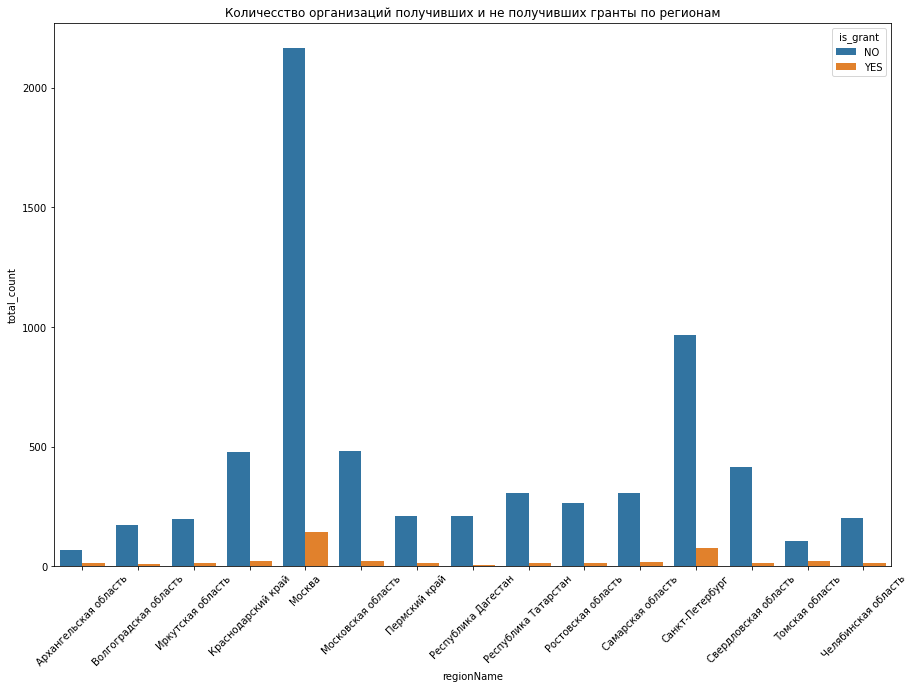

In [309]:
# группируем данные по регионам и маячку о получении грантов
df_plot2 = df_plot.groupby(['regionName','is_grant'],as_index=False)['total_count'].count()

# строим график с количеством организаций получивших и не получивших гранты.
# здесь total_count выступает количеством организаций в регионе
fig = plt.figure(figsize=(15, 10))
barplot = sns.barplot(
    data=df_plot2,
    x='regionName',
    y='total_count',
    hue= 'is_grant'
)
plt.xticks(rotation=45)
barplot.set_title('Количесство организаций получивших и не получивших гранты по регионам');

In [310]:
# cоздаем ещё одну таблицу с регионам и количество организаций в этом регионе
df_plot3 = df_plot.groupby('regionName', as_index=False)['total_count'].count()
# добавляем дял каждого региона количесство организаций, получивших гранты
df_plot3 = df_plot3.merge(
    df_plot2[df_plot2['is_grant']=='YES'][['regionName','total_count']],
    on='regionName'
)
# считаем вероятность и удаляем вспомогательные столбцы
df_plot3['probability'] = round(df_plot3['total_count_y']/df_plot3['total_count_x'], 3)
#df_plot3 = df_plot3.drop('total_count_x', axis=1)
#df_plot3 = df_plot3.drop('total_count_y', axis=1)

df_plot3

,regionName,total_count_x,total_count_y,probability
0,Архангельская область,80,13,0.162
1,Волгоградская область,184,10,0.054
2,Иркутская область,214,15,0.070
3,Краснодарский край,496,20,0.040
4,Москва,2307,143,0.062
5,Московская область,505,22,0.044
6,Пермский край,222,14,0.063
7,Республика Дагестан,212,4,0.019
8,Республика Татарстан,319,12,0.038
9,Ростовская область,276,12,0.043


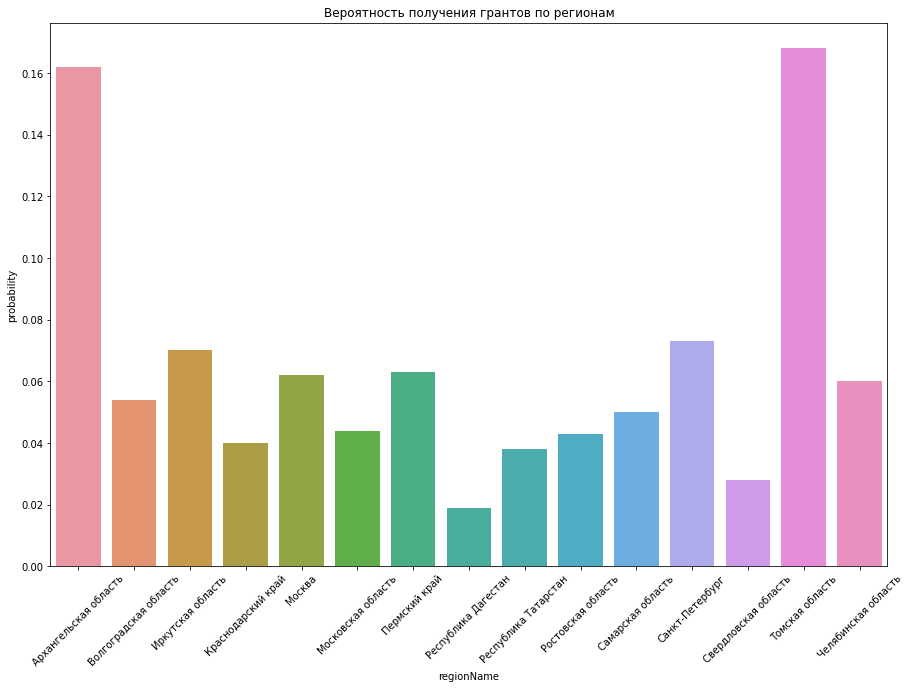

In [311]:
# строим график с вероятностями по регионам
fig = plt.figure(figsize=(15, 10))
barplot = sns.barplot(
    data=df_plot3,
    x='regionName',
    y='probability'
)
plt.xticks(rotation=45)
barplot.set_title('Вероятность получения грантов по регионам');

# ЗАДАЧА № 2

In [312]:
df_total['age'].nunique()

20

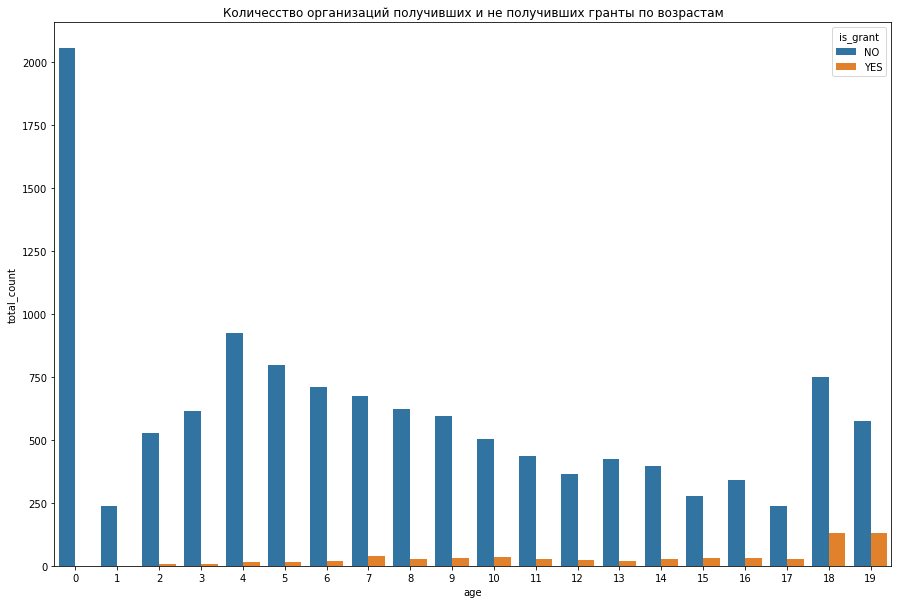

In [313]:
# группируем данные по возрасту и маячку о получении грантов
df_plot2 = df_total.groupby(['age','is_grant'],as_index=False)['total_count'].count()
 
# строим график с количеством организаций получивших и не получивших гранты.
# здесь total_count выступает количеством организаций по возрасту
fig = plt.figure(figsize=(15, 10))
barplot = sns.barplot(
   data=df_plot2,
   x='age',
   y='total_count',
   hue= 'is_grant'
)
barplot.set_title('Количесство организаций получивших и не получивших гранты по возрастам');



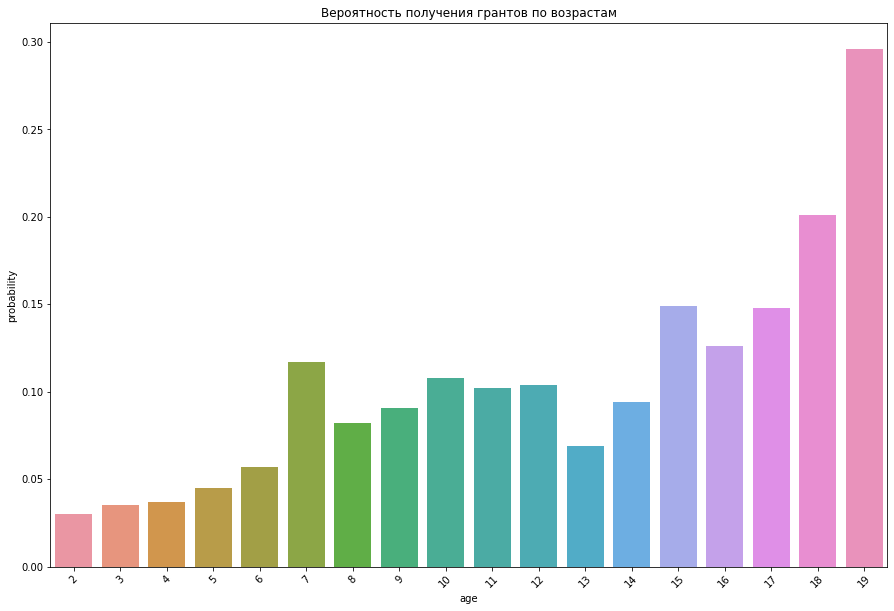

In [314]:
# cоздаем ещё одну таблицу с возрастом и количество организаций
df_plot3 = df_plot.groupby('age', as_index=False)['total_count'].count()
# добавляем дял каждого возраста количесство организаций, получивших гранты
df_plot3 = df_plot3.merge(
   df_plot2[df_plot2['is_grant']=='YES'][['age','total_count']],
   on='age'
)
# считаем вероятность и удаляем вспомогательные столбцы
df_plot3['probability'] = round(df_plot3['total_count_y']/df_plot3['total_count_x'], 3)
df_plot3 = df_plot3.drop('total_count_x', axis=1)
df_plot3 = df_plot3.drop('total_count_y', axis=1)

# строим график с вероятностями по возрасту
fig = plt.figure(figsize=(15, 10))
barplot = sns.barplot(
   data=df_plot3,
   x='age',
   y='probability'
)
plt.xticks(rotation=45)
barplot.set_title('Вероятность получения грантов по возрастам');

In [292]:
df_plot3

,age,probability
0,2,0.013
1,3,0.023
2,4,0.023
3,5,0.025
4,6,0.035
5,7,0.078
6,8,0.036
7,9,0.054
8,10,0.070
9,11,0.055


# ЗАДАЧА № 3

Проверить, есть ли зависимость вероятности получения грантов от государства / госконтрактов от экономической деятельности

In [301]:
# отбираем топ-15 деятельностей по наибольшой общей сумме грантов
df_regions = df_total.groupby(by='mainOkved_code')['incomeTotal'].sum().sort_values(ascending=False)
regions = list(df_regions.index[0:15])
regions

# фильтруем дата-сет - оставляем только найденные топ-15 mainOkved_code
mask = df_total['mainOkved_code'].isin(regions)
mask
df_plot = df_total[mask]

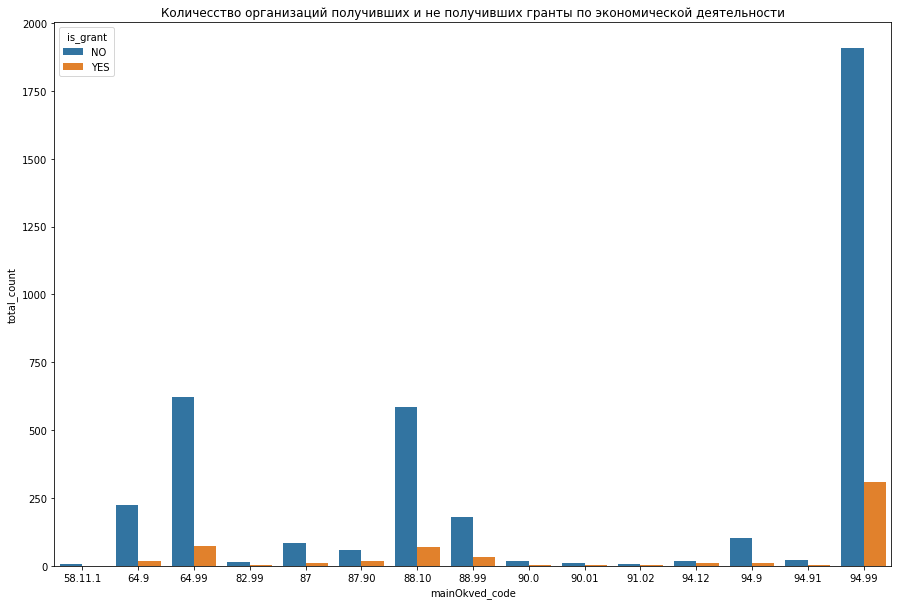

In [302]:
# группируем данные по mainOkved_code и маячку о получении грантов
df_plot2 = df_plot.groupby(['mainOkved_code','is_grant'],as_index=False)['total_count'].count()
# строим график с количеством организаций получивших и не получивших гранты.
# здесь total_count выступает количеством организаций по возрасту
fig = plt.figure(figsize=(15, 10))
barplot = sns.barplot(
  data=df_plot2,
  x='mainOkved_code',
  y='total_count',
  hue= 'is_grant'
)
barplot.set_title('Количесство организаций получивших и не получивших гранты по экономической деятельности');
 


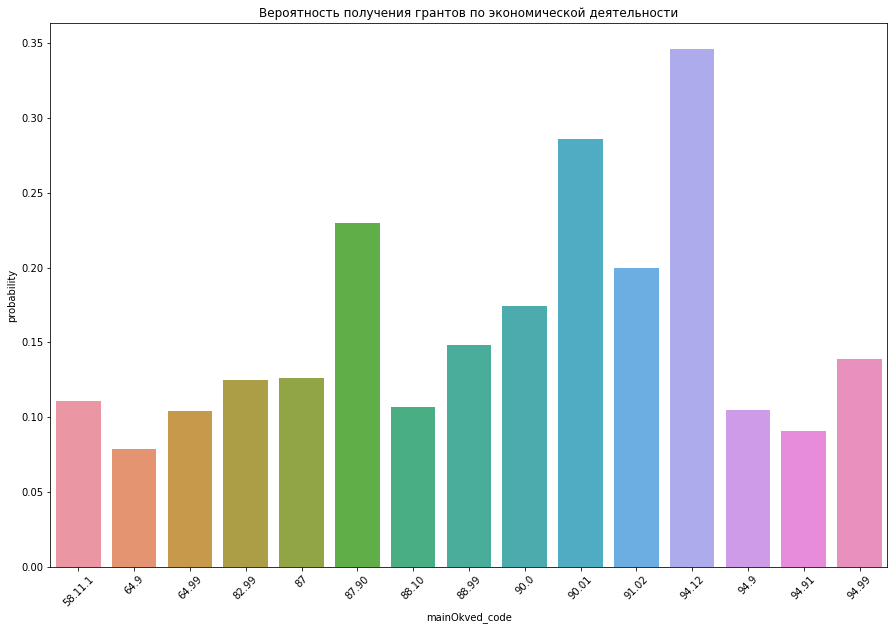

In [304]:

# cоздаем ещё одну таблицу с mainOkved_code и количество организаций
df_plot3 = df_plot.groupby('mainOkved_code', as_index=False)['total_count'].count()
# добавляем дял каждого возраста количесство организаций, получивших гранты
df_plot3 = df_plot3.merge(
  df_plot2[df_plot2['is_grant']=='YES'][['mainOkved_code','total_count']],
  on='mainOkved_code'
)
# считаем вероятность и удаляем вспомогательные столбцы
df_plot3['probability'] = round(df_plot3['total_count_y']/df_plot3['total_count_x'], 3)
df_plot3 = df_plot3.drop('total_count_x', axis=1)
df_plot3 = df_plot3.drop('total_count_y', axis=1)
 
# строим график с вероятностями по возрасту
fig = plt.figure(figsize=(15, 10))
barplot = sns.barplot(
  data=df_plot3,
  x='mainOkved_code',
  y='probability'
)
plt.xticks(rotation=45)
barplot.set_title('Вероятность получения грантов по экономической деятельности');

In [305]:
df_plot3

,mainOkved_code,probability
0,58.11.1,0.111
1,64.9,0.079
2,64.99,0.104
3,82.99,0.125
4,87,0.126
5,87.90,0.230
6,88.10,0.107
7,88.99,0.148
8,90.0,0.174
9,90.01,0.286


In [69]:
task_1_totalincome = df_total.pivot_table(values='incomeTotal', index='regionName')

In [70]:
task_1_totalincome.sort_values(by='incomeTotal', ascending=False) 

,incomeTotal
regionName,
Республика Крым,6.570817e+06
Ростовская область,2.807552e+06
Амурская область,2.797609e+06
Псковская область,1.586652e+06
Ненецкий автономный округ,1.561818e+06
...,...
Забайкальский край,0.000000e+00
Магаданская область,0.000000e+00
Чукотский автономный округ,0.000000e+00


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Республика Крым'),
  Text(1, 0, 'Ростовская область'),
  Text(2, 0, 'Амурская область'),
  Text(3, 0, 'Псковская область'),
  Text(4, 0, 'Ненецкий автономный округ'),
  Text(5, 0, 'Республика Башкортостан'),
  Text(6, 0, 'Москва'),
  Text(7, 0, 'Архангельская область'),
  Text(8, 0, 'Иркутская область'),
  Text(9, 0, 'Брянская область')])

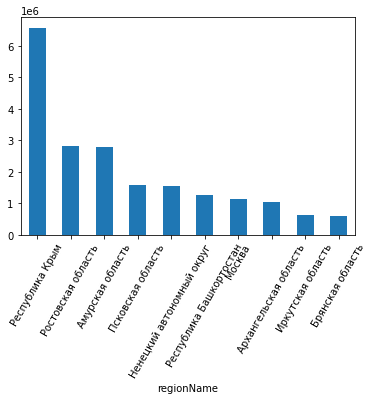

In [71]:
task_1_totalincome.groupby(['regionName'])['incomeTotal'].first().nlargest(10).plot(kind='bar');
plt.xticks(rotation=60)

In [72]:
task_1_grants_sum = df_total.pivot_table(values='grants_sum', index='regionName')

In [73]:
task_1_grants_sum.sort_values(by='grants_sum', ascending=False) 

,grants_sum
regionName,
Архангельская область,774005.538272
Брянская область,502246.636364
Москва,386358.054013
Псковская область,384964.167241
Костромская область,367290.364000
...,...
Забайкальский край,0.000000
Кабардино-Балкарская республика,0.000000
Республика Бурятия,0.000000


Text(0, 0.5, 'Сумма грантов')

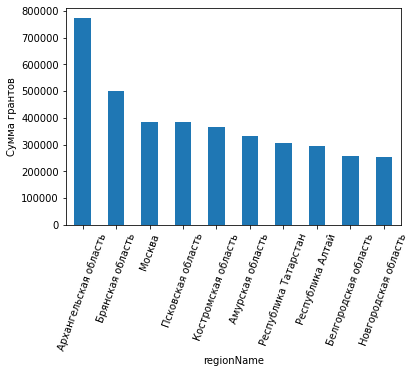

In [74]:
task_1_grants_sum.groupby(['regionName'])['grants_sum'].first().nlargest(10).plot(kind='bar');
plt.xticks(rotation=70)
plt.ylabel("Сумма грантов")

In [75]:
task_1_grants_count = df_total.pivot_table(values='grants_count', index='regionName')
task_1_grants_count.sort_values(by='grants_count', ascending=False) 


,grants_count
regionName,
Псковская область,0.241379
Республика Алтай,0.230769
Архангельская область,0.222222
Брянская область,0.200000
Амурская область,0.185185
...,...
Магаданская область,0.000000
Республика Хакасия,0.000000
Карачаево-Черкесская республика,0.000000


Text(0, 0.5, 'Кол-во грантов')

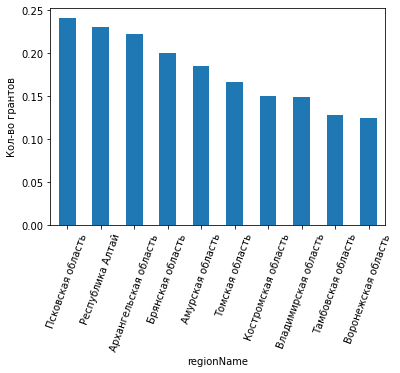

In [76]:
task_1_grants_count.groupby(['regionName'])['grants_count'].first().nlargest(10).plot(kind='bar')
plt.xticks(rotation=70)
plt.ylabel("Кол-во грантов")

In [77]:
task_1_fedSubsidies_sum = df_total.pivot_table(values='fedSubsidies_sum', index='regionName')

In [78]:
task_1_fedSubsidies_sum.sort_values(by='fedSubsidies_sum', ascending=False)

,fedSubsidies_sum
regionName,
Республика Крым,6.570611e+06
Москва,2.410981e+05
Ростовская область,1.986348e+05
Тульская область,1.583867e+05
Омская область,1.509054e+05
...,...
Республика Дагестан,0.000000e+00
Иркутская область,0.000000e+00
Республика Калмыкия,0.000000e+00


Text(0, 0.5, 'Сумма субсидий')

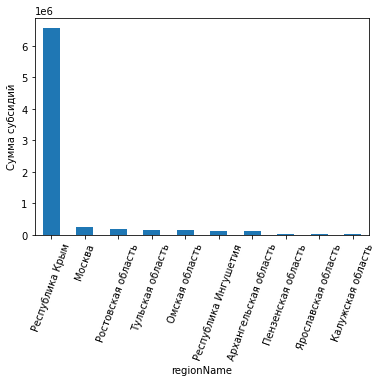

In [79]:
task_1_fedSubsidies_sum.groupby(['regionName'])['fedSubsidies_sum'].first().nlargest(10).plot(kind='bar')
plt.xticks(rotation=70)
plt.ylabel("Сумма субсидий")

In [80]:
task_1_fedSubsidies_count = df_total.pivot_table(values='fedSubsidies_count', index='regionName')
task_1_fedSubsidies_count

,fedSubsidies_count
regionName,
Алтайский край,0.005747
Амурская область,0.000000
Архангельская область,0.012346
Астраханская область,0.000000
Белгородская область,0.000000
...,...
Чеченская республика,0.000000
Чувашская республика,0.000000
Чукотский автономный округ,0.000000


Text(0, 0.5, 'кол-во субсидий')

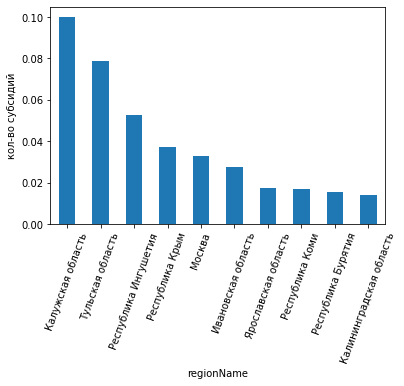

In [81]:
task_1_fedSubsidies_count.groupby(['regionName'])['fedSubsidies_count'].first().nlargest(10).plot(kind='bar')
plt.xticks(rotation=70)
plt.ylabel("кол-во субсидий")

In [82]:
task_1_contracts_sum = df_total.pivot_table(values='contracts_sum', index='regionName')

In [83]:
task_1_contracts_sum.sort_values(by='contracts_sum', ascending=False)

,contracts_sum
regionName,
Ростовская область,2.578306e+06
Амурская область,2.466894e+06
Ненецкий автономный округ,1.561818e+06
Псковская область,1.201688e+06
Республика Башкортостан,1.189065e+06
...,...
Республика Ингушетия,0.000000e+00
Республика Алтай,0.000000e+00
Республика Адыгея,0.000000e+00


Text(0, 0.5, 'Сумма госконтрактов')

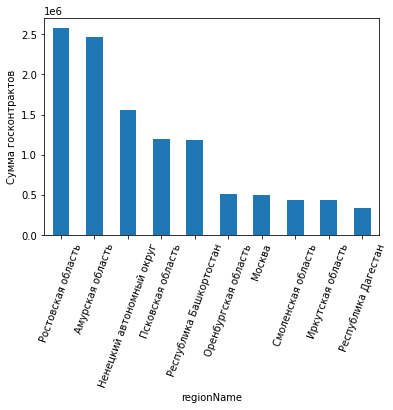

In [84]:
task_1_contracts_sum.groupby(['regionName'])['contracts_sum'].first().nlargest(10).plot(kind='bar')
plt.xticks(rotation=70)
plt.ylabel("Сумма госконтрактов")

In [85]:
task_1_contracts_count = df_total.pivot_table(values='contracts_count', index='regionName')
task_1_contracts_count.sort_values(by='contracts_count', ascending=False)

,contracts_count
regionName,
Псковская область,11.586207
Смоленская область,2.042857
Оренбургская область,1.449541
Ненецкий автономный округ,1.000000
Амурская область,0.833333
...,...
Республика Карелия,0.000000
Республика Марий Эл,0.000000
Республика Мордовия,0.000000


Text(0, 0.5, 'Кол-во госконтрактов')

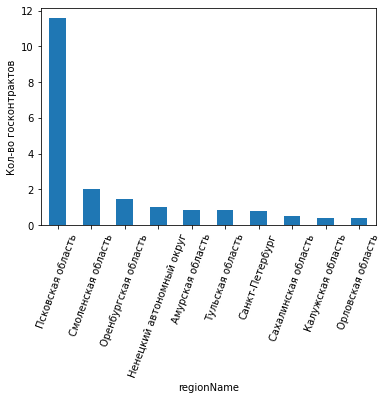

In [86]:
task_1_contracts_count.groupby(['regionName'])['contracts_count'].first().nlargest(10).plot(kind='bar')
plt.xticks(rotation=70)
plt.ylabel("Кол-во госконтрактов")

In [87]:
task_2_totalincome = df_total.pivot_table(values='incomeTotal', index='age')
task_2_totalincome.sort_values(by='incomeTotal', ascending=False) 

,incomeTotal
age,
17,4.858740e+06
19,2.248756e+06
18,1.105656e+06
7,1.071830e+06
15,6.035802e+05
12,5.422277e+05
10,4.037763e+05
14,3.861395e+05
16,3.309209e+05


Text(0, 0.5, 'Общий доход')

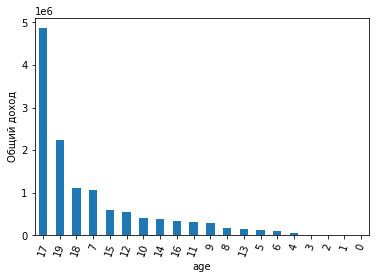

In [88]:
task_2_totalincome.groupby(['age'])['incomeTotal'].first().nlargest(20).plot(kind='bar')
plt.xticks(rotation=70)
plt.ylabel("Общий доход")

In [89]:
task_2_grants_sum = df_total.pivot_table(values='grants_sum', index='age')
task_2_grants_sum.sort_values(by='grants_sum', ascending=False) 

,grants_sum
age,
19,692806.180763
12,478414.956667
18,411738.236476
14,346152.784216
10,289613.162791
17,263837.744601
9,208686.488581
15,175469.425210
11,170609.806179


In [90]:
task_2_grants_count = df_total.pivot_table(values='grants_count', index='age')
task_2_grants_count.sort_values(by='grants_count', ascending=False) 

,grants_count
age,
19,0.208232
12,0.168116
18,0.162485
14,0.132353
10,0.129670
11,0.091811
9,0.086811
17,0.079812
13,0.077320


Text(0, 0.5, 'Кол-во грантов')

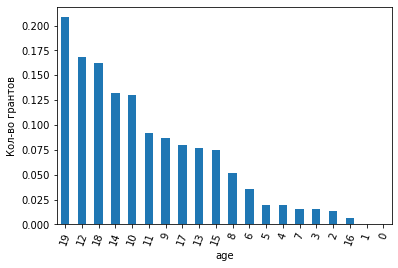

In [91]:
task_2_grants_count.groupby(['age'])['grants_count'].first().nlargest(30).plot(kind='bar')
plt.xticks(rotation=70)
plt.ylabel("Кол-во грантов")

Text(0, 0.5, 'Сумма грантов')

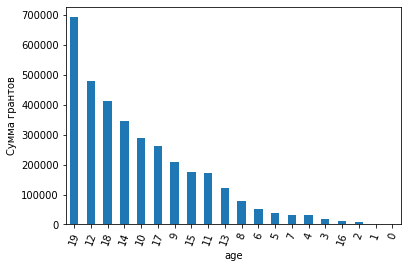

In [92]:
task_2_grants_sum.groupby(['age'])['grants_sum'].first().nlargest(30).plot(kind='bar')
plt.xticks(rotation=70)
plt.ylabel("Сумма грантов")

In [93]:
task_2_fedSubsidies_sum = df_total.pivot_table(values='fedSubsidies_sum', index='age')
task_2_fedSubsidies_sum.sort_values(by='fedSubsidies_sum', ascending=False) 

,fedSubsidies_sum
age,
7,978794.413862
19,422483.444697
15,175172.098353
18,120971.974910
10,54399.230769
8,51618.418088
17,28171.361502
9,15235.360601
16,11990.344828


Text(0, 0.5, 'Сумма субсидий')

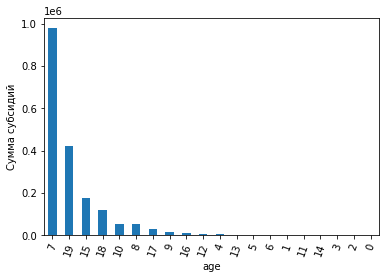

In [94]:
task_2_fedSubsidies_sum.groupby(['age'])['fedSubsidies_sum'].first().nlargest(20).plot(kind='bar');\
plt.xticks(rotation=70)
plt.ylabel("Сумма субсидий")

In [95]:
task_2_fedSubsidies_count = df_total.pivot_table(values='fedSubsidies_count', index='age')
task_2_fedSubsidies_count.sort_values(by='fedSubsidies_count', ascending=False) 

,fedSubsidies_count
age,
19,0.071429
17,0.028169
16,0.024138
18,0.019116
10,0.010989
8,0.009191
15,0.008982
7,0.005517
4,0.005470


Text(0, 0.5, 'Кол-во субсидий')

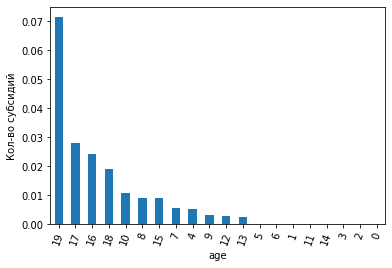

In [96]:
task_2_fedSubsidies_count.groupby(['age'])['fedSubsidies_count'].first().nlargest(20).plot(kind='bar');\
plt.xticks(rotation=70)
plt.ylabel("Кол-во субсидий")

In [97]:
task_2_contracts_sum = df_total.pivot_table(values='contracts_sum', index='age')
task_2_contracts_sum.sort_values(by='contracts_sum', ascending=False) 

,contracts_sum
age,
17,4.566731e+06
19,1.133466e+06
18,5.729461e+05
16,3.072695e+05
15,2.529387e+05
11,1.402789e+05
5,7.698298e+04
7,6.000996e+04
10,5.976394e+04


Text(0, 0.5, 'Сумма госконтрактов')

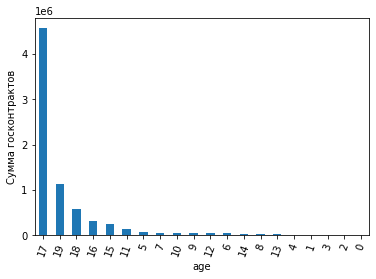

In [98]:
task_2_contracts_sum.groupby(['age'])['contracts_sum'].first().nlargest(20).plot(kind='bar')
plt.xticks(rotation=70)
plt.ylabel("Сумма госконтрактов")

In [99]:
task_2_contracts_count = df_total.pivot_table(values='contracts_count', index='age')
task_2_contracts_count.sort_values(by='contracts_count', ascending=False) 

,contracts_count
age,
17,0.943662
18,0.934289
11,0.913151
19,0.605327
15,0.425150
5,0.272941
8,0.255515
16,0.237931
7,0.226207


Text(0, 0.5, 'Кол-во госконтрактов')

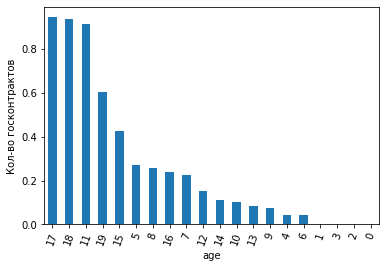

In [100]:
task_2_contracts_count.groupby(['age'])['contracts_count'].first().nlargest(20).plot(kind='bar')
plt.xticks(rotation=70)
plt.ylabel("Кол-во госконтрактов")

In [101]:
task_3_totalimcome = df_total.pivot_table(values='incomeTotal', index='mainOkved_code')
task_3_totalimcome.sort_values(by='incomeTotal', ascending=False)


,incomeTotal
mainOkved_code,
64.92.7,7.096260e+08
86.90.4,6.975763e+07
86.10,4.382738e+07
70.22,2.723540e+07
90.01,2.121761e+07
...,...
52.46,0.000000e+00
52.44.2,0.000000e+00
52.42,0.000000e+00


Text(0, 0.5, 'Общий доход')

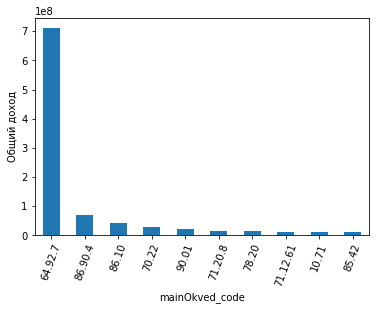

In [102]:
task_3_totalimcome.groupby(['mainOkved_code'])['incomeTotal'].first().nlargest(10).plot(kind='bar')
plt.xticks(rotation=70)
plt.ylabel("Общий доход")

In [103]:
task_3_grants_sum = df_total.pivot_table(values='grants_sum', index='mainOkved_code')
task_3_grants_sum.sort_values(by='grants_sum', ascending=False)

,grants_sum
mainOkved_code,
71.12.53,6.331427e+06
91.02,4.332946e+06
82.99,3.668257e+06
71.12.6,3.500000e+06
91.0,2.037933e+06
...,...
52.44.2,0.000000e+00
52.42,0.000000e+00
52.22.2,0.000000e+00


Text(0, 0.5, 'Сумма грантов')

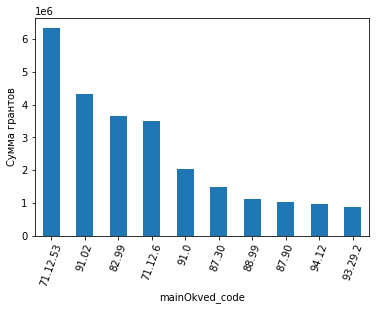

In [104]:
task_3_grants_sum.groupby(['mainOkved_code'])['grants_sum'].first().nlargest(10).plot(kind='bar')
plt.xticks(rotation=70)
plt.ylabel("Сумма грантов")

In [105]:
task_3_fedSubsidies_sum = df_total.pivot_table(values='fedSubsidies_sum', index='mainOkved_code')
task_3_fedSubsidies_sum.sort_values(by='fedSubsidies_sum', ascending=False)

,fedSubsidies_sum
mainOkved_code,
64.92.7,7.096260e+08
71.12.61,1.203739e+07
94.11,3.232638e+06
10.51,2.919622e+06
85.22,1.343410e+06
...,...
52.46,0.000000e+00
52.44.2,0.000000e+00
52.42,0.000000e+00


Text(0, 0.5, 'Сумма субсидий')

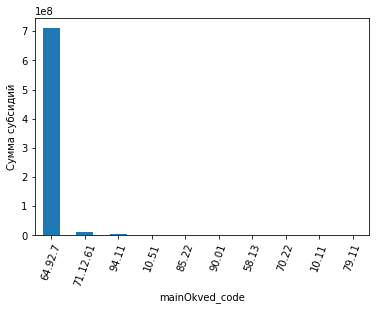

In [106]:
task_3_fedSubsidies_sum.groupby(['mainOkved_code'])['fedSubsidies_sum'].first().nlargest(10).plot(kind='bar')
plt.xticks(rotation=70)
plt.ylabel("Сумма субсидий")

In [107]:
task_3_contracts_sum = df_total.pivot_table(values='contracts_sum', index='mainOkved_code')
task_3_contracts_sum.sort_values(by='contracts_sum', ascending=False)

,contracts_sum
mainOkved_code,
86.90.4,6.975763e+07
86.10,4.382738e+07
70.22,2.592705e+07
90.01,1.942459e+07
71.20.8,1.639700e+07
...,...
52.44.2,0.000000e+00
52.42,0.000000e+00
52.22.2,0.000000e+00


Text(0, 0.5, 'Сумма госконтрактов')

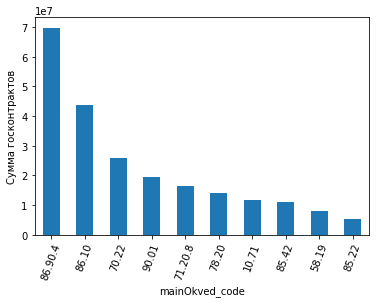

In [108]:
task_3_contracts_sum.groupby(['mainOkved_code'])['contracts_sum'].first().nlargest(10).plot(kind='bar')
plt.xticks(rotation=70)
plt.ylabel("Сумма госконтрактов")